In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [14]:
df= pd.read_csv("datas/Healthcare-Diabetes.csv")

In [7]:
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [9]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df=df.drop(columns=["Id"])

In [17]:
df.duplicated().sum()

1990

In [26]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     187
BMI                         253
DiabetesPedigreeFunction    523
Age                          52
Outcome                       2
dtype: int64

#### Data Visualization

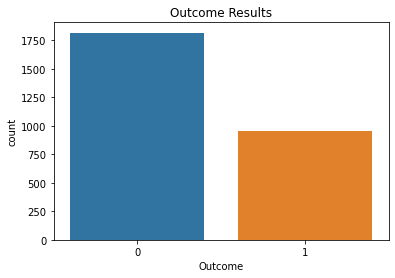

In [20]:
sns.countplot(x=df['Outcome'])
plt.title('Outcome Results');

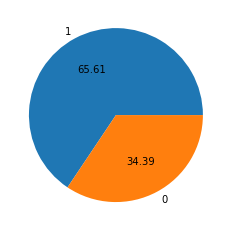

In [22]:
plt.pie(df.groupby(by=["Outcome"]).size(), labels = df["Outcome"].unique(), autopct = "%0.2f")
plt.show()

##### the correlation matrix

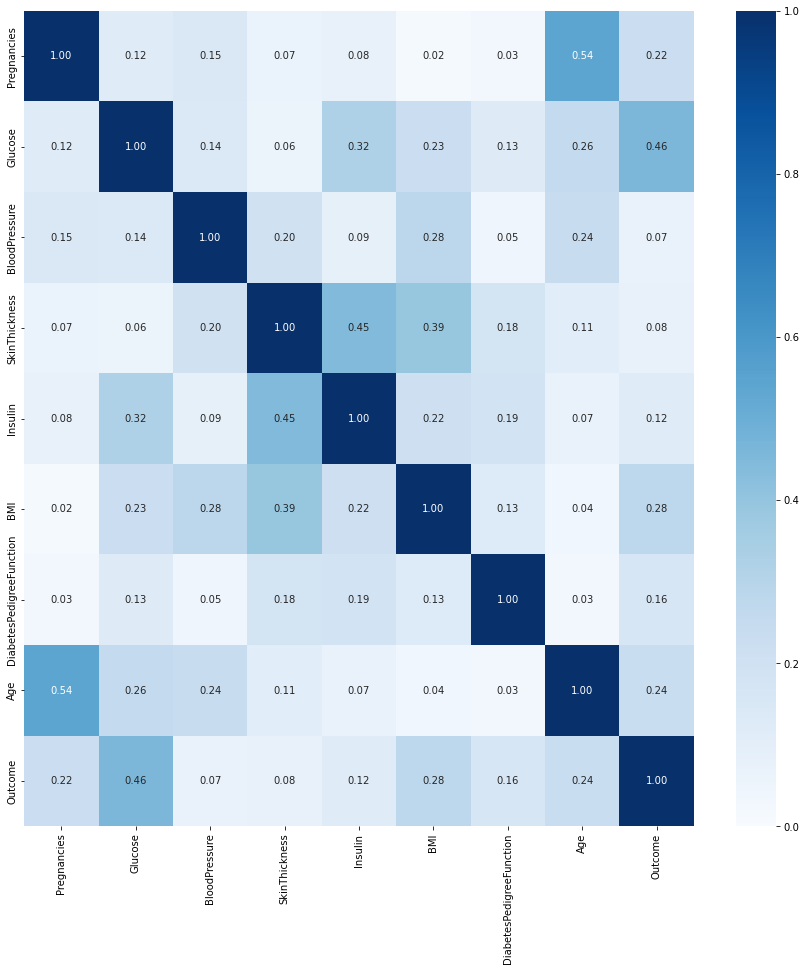

In [23]:
corr=abs(df.corr())
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues', fmt='.2f')
plt.show()

##### Calculate the correlation with the target column

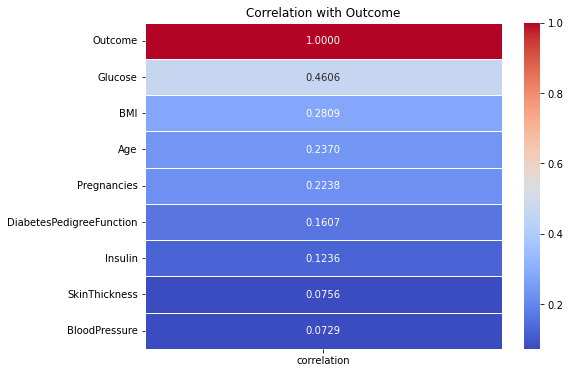

In [29]:
corr = df.corrwith(df['Outcome']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr , columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation with Outcome')
plt.show()

##### visualise the correlation with the target column

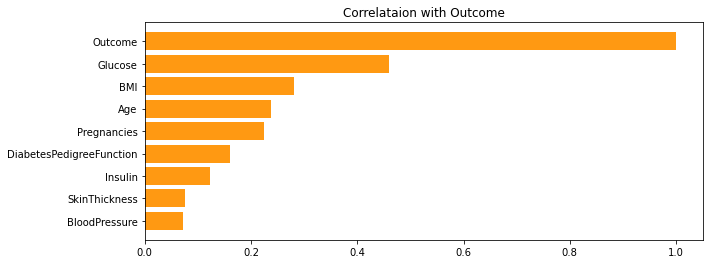

In [30]:
corr = plt.figure(figsize = (10, 4))
outcome_corr = pd.DataFrame(df.corr()['Outcome'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['Outcome'],color="#FF9912")
plt.title('Correlataion with Outcome')
plt.show()

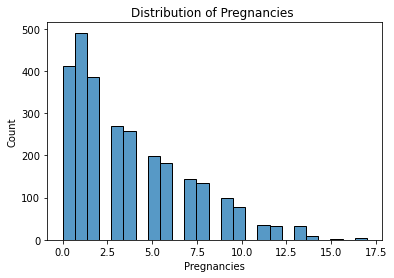

In [31]:
sns.histplot(x=df.Pregnancies,bins=25)
plt.title('Distribution of Pregnancies ')
plt.show()

##### Distribution of columns with target column "Outcome"

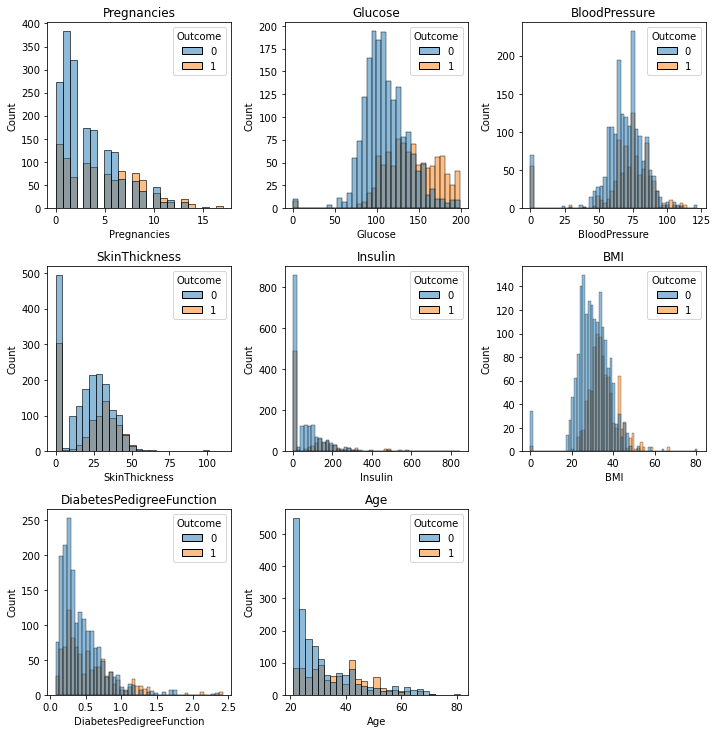

In [33]:
num_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='Outcome')

plt.tight_layout()

#### Split dataframe into X and y

In [37]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=17)

DecisionTree

In [42]:
DT_model = DecisionTreeClassifier(random_state=20)
DT_model.fit(X_train , y_train)
DT_model.score(X_test , y_test)

0.9915764139590855

In [43]:
DT_pred=DT_model.predict(X_test)
DT_acc = accuracy_score(y_test ,DT_pred )
print(classification_report(y_test , DT_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      1.00      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



SVM

In [44]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc.score(X_train , y_train)

0.774909654104285

In [45]:
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test , svc_pred)
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       539
           1       0.72      0.51      0.60       292

    accuracy                           0.76       831
   macro avg       0.75      0.70      0.71       831
weighted avg       0.75      0.76      0.75       831



Random forest

In [46]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)
RF_model.score(X_train , y_train)

1.0

In [47]:
RF_pred = RF_model.predict(X_test)
RF_acc=accuracy_score(y_test , RF_pred)
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      0.99      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Models scores

In [48]:
models=pd.DataFrame({
    'models':['Decsion_Tree','SVC','Random_forest'],
    'scores':[DT_acc,svc_acc,RF_acc]})
models.sort_values(by='scores',ascending=True)

,models,scores
1,SVC,0.759326
2,Random_forest,0.990373
0,Decsion_Tree,0.991576
